In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly as plty

In [2]:
data=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')
#data=df.sample(n=200000,random_state=42)
data

,id,Podcast_Name,Episode_Title,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment,Listening_Time_minutes
0,0,Mystery Matters,Episode 98,NaN,True Crime,74.81,Thursday,Night,NaN,0.0,Positive,31.41998
1,1,Joke Junction,Episode 26,119.80,Comedy,66.95,Saturday,Afternoon,75.95,2.0,Negative,88.01241
2,2,Study Sessions,Episode 16,73.90,Education,69.97,Tuesday,Evening,8.97,0.0,Negative,44.92531
3,3,Digital Digest,Episode 45,67.17,Technology,57.22,Monday,Morning,78.70,2.0,Positive,46.27824
4,4,Mind & Body,Episode 86,110.51,Health,80.07,Monday,Afternoon,58.68,3.0,Neutral,75.61031
...,...,...,...,...,...,...,...,...,...,...,...,...
749995,749995,Learning Lab,Episode 25,75.66,Education,69.36,Saturday,Morning,NaN,0.0,Negative,56.87058
749996,749996,Business Briefs,Episode 21,75.75,Business,35.21,Saturday,Night,NaN,2.0,Neutral,45.46242
749997,749997,Lifestyle Lounge,Episode 51,30.98,Lifestyle,78.58,Thursday,Morning,84.89,0.0,Negative,15.26000
749998,749998,Style Guide,Episode 47,108.98,Lifestyle,45.39,Thursday,Morning,93.27,0.0,Negative,100.72939


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750000 entries, 0 to 749999
Data columns (total 12 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           750000 non-null  int64  
 1   Podcast_Name                 750000 non-null  object 
 2   Episode_Title                750000 non-null  object 
 3   Episode_Length_minutes       662907 non-null  float64
 4   Genre                        750000 non-null  object 
 5   Host_Popularity_percentage   750000 non-null  float64
 6   Publication_Day              750000 non-null  object 
 7   Publication_Time             750000 non-null  object 
 8   Guest_Popularity_percentage  603970 non-null  float64
 9   Number_of_Ads                749999 non-null  float64
 10  Episode_Sentiment            750000 non-null  object 
 11  Listening_Time_minutes       750000 non-null  float64
dtypes: float64(5), int64(1), object(6)
memory usage: 68.7+ MB


In [4]:
#sns.scatterplot(data['Host_Popularity_percentage'])
data.describe()

,id,Episode_Length_minutes,Host_Popularity_percentage,Guest_Popularity_percentage,Number_of_Ads,Listening_Time_minutes
count,750000.000000,662907.000000,750000.000000,603970.000000,749999.000000,750000.000000
mean,374999.500000,64.504738,59.859901,52.236449,1.348855,45.437406
std,216506.495284,32.969603,22.873098,28.451241,1.151130,27.138306
min,0.000000,0.000000,1.300000,0.000000,0.000000,0.000000
25%,187499.750000,35.730000,39.410000,28.380000,0.000000,23.178350
50%,374999.500000,63.840000,60.050000,53.580000,1.000000,43.379460
75%,562499.250000,94.070000,79.530000,76.600000,2.000000,64.811580
max,749999.000000,325.240000,119.460000,119.910000,103.910000,119.970000


In [5]:
data['Publication_Day'].value_counts()

Publication_Day
Sunday       115946
Monday       111963
Friday       108237
Wednesday    107886
Thursday     104360
Saturday     103505
Tuesday       98103
Name: count, dtype: int64

In [6]:
data['Publication_Day']=data['Publication_Day'].map({'Sunday':1, 'Monday':2,'Tuesday':3,'Wednesday':4,'Thursday':5,'Friday':6,'Saturday':7})
data['Publication_Time']=data['Publication_Time'].map({'Morning':1,'Evening':2,'Afternoon':3,'Night':4})
data['Episode_Sentiment']=data['Episode_Sentiment'].map({'Negative':1,'Neutral':2,'Positive':3})
test['Publication_Day']=test['Publication_Day'].map({'Sunday':1, 'Monday':2,'Tuesday':3,'Wednesday':4,'Thursday':5,'Friday':6,'Saturday':7})
test['Publication_Time']=test['Publication_Time'].map({'Morning':1,'Evening':2,'Afternoon':3,'Night':4})
test['Episode_Sentiment']=test['Episode_Sentiment'].map({'Negative':1,'Neutral':2,'Positive':3})
data

,id,Podcast_Name,Episode_Title,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment,Listening_Time_minutes
0,0,Mystery Matters,Episode 98,NaN,True Crime,74.81,5,4,NaN,0.0,3,31.41998
1,1,Joke Junction,Episode 26,119.80,Comedy,66.95,7,3,75.95,2.0,1,88.01241
2,2,Study Sessions,Episode 16,73.90,Education,69.97,3,2,8.97,0.0,1,44.92531
3,3,Digital Digest,Episode 45,67.17,Technology,57.22,2,1,78.70,2.0,3,46.27824
4,4,Mind & Body,Episode 86,110.51,Health,80.07,2,3,58.68,3.0,2,75.61031
...,...,...,...,...,...,...,...,...,...,...,...,...
749995,749995,Learning Lab,Episode 25,75.66,Education,69.36,7,1,NaN,0.0,1,56.87058
749996,749996,Business Briefs,Episode 21,75.75,Business,35.21,7,4,NaN,2.0,2,45.46242
749997,749997,Lifestyle Lounge,Episode 51,30.98,Lifestyle,78.58,5,1,84.89,0.0,1,15.26000
749998,749998,Style Guide,Episode 47,108.98,Lifestyle,45.39,5,1,93.27,0.0,1,100.72939


In [7]:
data['Genre'].value_counts()

Genre
Sports        87606
Technology    86256
True Crime    85059
Lifestyle     82461
Comedy        81453
Business      80521
Health        71416
News          63385
Music         62743
Education     49100
Name: count, dtype: int64

In [8]:
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder,OneHotEncoder
la=LabelEncoder()
data['Genre']=la.fit_transform(data[['Genre']])
test['Genre']=la.fit_transform(test[['Genre']])
data['Genre']

C:\Users\lapto\AppData\Roaming\Python\Python312\site-packages\sklearn\preprocessing\_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\lapto\AppData\Roaming\Python\Python312\site-packages\sklearn\preprocessing\_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0         9
1         1
2         2
3         8
4         3
         ..
749995    2
749996    0
749997    4
749998    4
749999    7
Name: Genre, Length: 750000, dtype: int32

In [9]:
data

,id,Podcast_Name,Episode_Title,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment,Listening_Time_minutes
0,0,Mystery Matters,Episode 98,NaN,9,74.81,5,4,NaN,0.0,3,31.41998
1,1,Joke Junction,Episode 26,119.80,1,66.95,7,3,75.95,2.0,1,88.01241
2,2,Study Sessions,Episode 16,73.90,2,69.97,3,2,8.97,0.0,1,44.92531
3,3,Digital Digest,Episode 45,67.17,8,57.22,2,1,78.70,2.0,3,46.27824
4,4,Mind & Body,Episode 86,110.51,3,80.07,2,3,58.68,3.0,2,75.61031
...,...,...,...,...,...,...,...,...,...,...,...,...
749995,749995,Learning Lab,Episode 25,75.66,2,69.36,7,1,NaN,0.0,1,56.87058
749996,749996,Business Briefs,Episode 21,75.75,0,35.21,7,4,NaN,2.0,2,45.46242
749997,749997,Lifestyle Lounge,Episode 51,30.98,4,78.58,5,1,84.89,0.0,1,15.26000
749998,749998,Style Guide,Episode 47,108.98,4,45.39,5,1,93.27,0.0,1,100.72939


In [10]:
data.drop('id',axis=1,inplace=True)
data.drop('Episode_Title',axis=1,inplace=True)
data.drop('Podcast_Name',axis=1,inplace=True)
id_test=test['id']
test.drop('id',axis=1,inplace=True)
test.drop('Episode_Title',axis=1,inplace=True)
test.drop('Podcast_Name',axis=1,inplace=True)
data

,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment,Listening_Time_minutes
0,NaN,9,74.81,5,4,NaN,0.0,3,31.41998
1,119.80,1,66.95,7,3,75.95,2.0,1,88.01241
2,73.90,2,69.97,3,2,8.97,0.0,1,44.92531
3,67.17,8,57.22,2,1,78.70,2.0,3,46.27824
4,110.51,3,80.07,2,3,58.68,3.0,2,75.61031
...,...,...,...,...,...,...,...,...,...
749995,75.66,2,69.36,7,1,NaN,0.0,1,56.87058
749996,75.75,0,35.21,7,4,NaN,2.0,2,45.46242
749997,30.98,4,78.58,5,1,84.89,0.0,1,15.26000
749998,108.98,4,45.39,5,1,93.27,0.0,1,100.72939


In [11]:
data['Number_of_Ads'].fillna(test['Number_of_Ads'].mean(),inplace=True)
data['Guest_Popularity_percentage'].fillna(test['Guest_Popularity_percentage'].mean(),inplace=True)
data['Episode_Length_minutes'].fillna(test['Episode_Length_minutes'].mean(),inplace=True)
test['Number_of_Ads'].fillna(test['Number_of_Ads'].mean(),inplace=True)
test['Guest_Popularity_percentage'].fillna(test['Guest_Popularity_percentage'].mean(),inplace=True)
test['Episode_Length_minutes'].fillna(test['Episode_Length_minutes'].mean(),inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750000 entries, 0 to 749999
Data columns (total 9 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Episode_Length_minutes       750000 non-null  float64
 1   Genre                        750000 non-null  int32  
 2   Host_Popularity_percentage   750000 non-null  float64
 3   Publication_Day              750000 non-null  int64  
 4   Publication_Time             750000 non-null  int64  
 5   Guest_Popularity_percentage  750000 non-null  float64
 6   Number_of_Ads                750000 non-null  float64
 7   Episode_Sentiment            750000 non-null  int64  
 8   Listening_Time_minutes       750000 non-null  float64
dtypes: float64(5), int32(1), int64(3)
memory usage: 48.6 MB


C:\Users\lapto\AppData\Local\Temp\ipykernel_32776\3723572222.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Number_of_Ads'].fillna(test['Number_of_Ads'].mean(),inplace=True)
C:\Users\lapto\AppData\Local\Temp\ipykernel_32776\3723572222.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always beha

In [12]:
data

,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment,Listening_Time_minutes
0,419.298741,9,74.81,5,4,52.192796,0.0,3,31.41998
1,119.800000,1,66.95,7,3,75.950000,2.0,1,88.01241
2,73.900000,2,69.97,3,2,8.970000,0.0,1,44.92531
3,67.170000,8,57.22,2,1,78.700000,2.0,3,46.27824
4,110.510000,3,80.07,2,3,58.680000,3.0,2,75.61031
...,...,...,...,...,...,...,...,...,...
749995,75.660000,2,69.36,7,1,52.192796,0.0,1,56.87058
749996,75.750000,0,35.21,7,4,52.192796,2.0,2,45.46242
749997,30.980000,4,78.58,5,1,84.890000,0.0,1,15.26000
749998,108.980000,4,45.39,5,1,93.270000,0.0,1,100.72939


C:\Users\lapto\AppData\Local\Temp\ipykernel_32776\2193346636.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=data,x='Episode_Length_minutes',y='Listening_Time_minutes',palette=['blue'],ax=axes1[0])
C:\Users\lapto\AppData\Local\Temp\ipykernel_32776\2193346636.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=data,x='Host_Popularity_percentage',y='Listening_Time_minutes',palette=['blue'],ax=axes1[1])
C:\Users\lapto\AppData\Local\Temp\ipykernel_32776\2193346636.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=data,x='Guest_Popularity_percentage',y='Listening_Time_minutes',palette=['blue'],ax=axes1[2])


<Axes: xlabel='Guest_Popularity_percentage', ylabel='Listening_Time_minutes'>

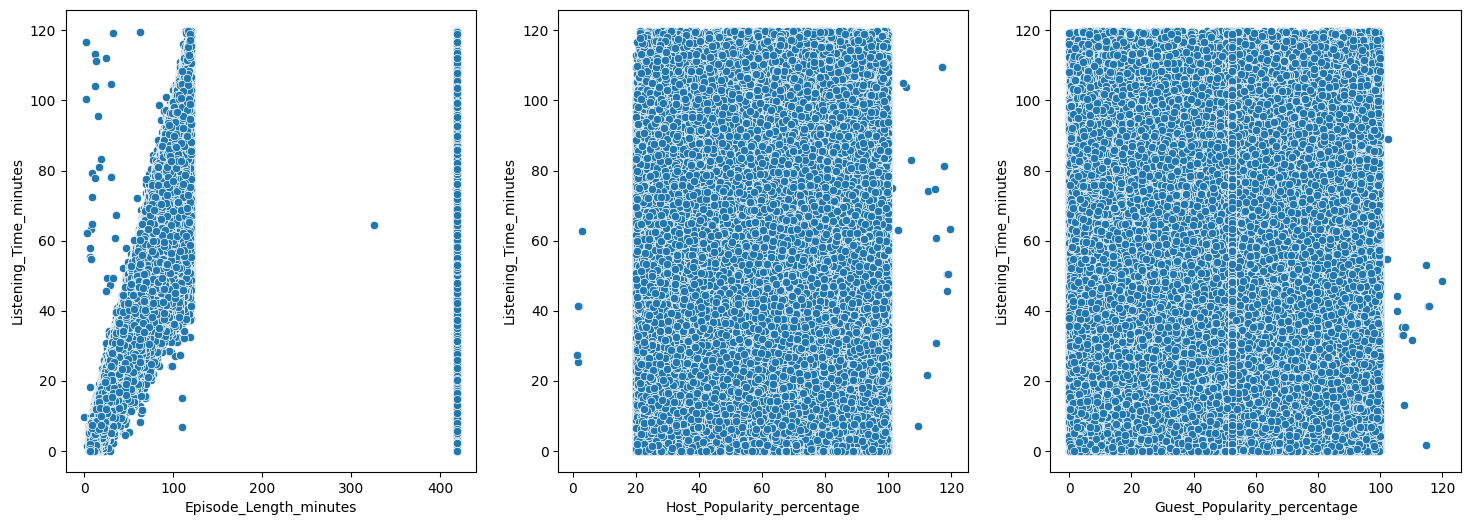

In [13]:
fig1, axes1 = plt.subplots(1, 3, figsize=(18, 6)) 
sns.scatterplot(data=data,x='Episode_Length_minutes',y='Listening_Time_minutes',palette=['blue'],ax=axes1[0])
sns.scatterplot(data=data,x='Host_Popularity_percentage',y='Listening_Time_minutes',palette=['blue'],ax=axes1[1])
sns.scatterplot(data=data,x='Guest_Popularity_percentage',y='Listening_Time_minutes',palette=['blue'],ax=axes1[2])

In [14]:
from summarytools import dfSummary
dfSummary(data)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,Episode_Length_minutes[float64],Mean (sd) : 105.7 (117.8)min < med < max:0.0 < 71.1 < 419.3IQR (CV) : 65.4 (0.9),"12,269 distinct values","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjkuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8hTgPZAAAACXBIWXMAAA9hAAAPYQGoP6dpAAACL0lEQVR4nO3dQa6aUBiG4f8UNagJxJjozA006cChi+hiu4QOXIE7cGZiDEbuJSLQUUdNFA7Q8tn3mR/uGbzB+0vkuKqqDBi6L/96A0Adoz4v7pybmtmkxSXuVVV9drUf6OotVOfcdLlcfo+iaOF7jev1enHO/SBW9HlHnURRtNjtdp9xHGdNFydJEu73+8X5fJ6YGaH+53r96Dczi+M4W61WH57Lp51uBrIYpiCh9ztqG0VRjM0scs75LGcQeyODDTVN03Ge5982m00QBEHj/3EZxN7LYEO93++jMAxn2+02W6/XlyZrGcTez2BD/W0+n/sOYwxib4RhChJe3lFbPF2KyrIce6wD/vA01DZPl/I8D4ui+Jpl2U8z8/0eFTCz13dU76dLx+NxcTgcZo/HI2ixP8DMag5TPk+XLpcLwww6wzAFCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYN/NTp0tDxS9OkpNoSKTrQ9UvTVKTaEiq54v/S5zik2hIpOtThS9OmLnxmmIIFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIaHWj/uSJAmbXvh2u4VmZmmahqfTafY31ydJEhZFMTKzyDnX9E/DT1SW5cinlTprfgFPZ6fM4/bnWgAAAABJRU5ErkJggg=="">",0(0.0%)
2,Genre[int32],1. 72. 83. 94. 45. 16. 07. 38. 69. 510. 2,"87,606 (11.7%)86,256 (11.5%)85,059 (11.3%)82,461 (11.0%)81,453 (10.9%)80,521 (10.7%)71,416 (9.5%)63,385 (8.5%)62,743 (8.4%)49,100 (6.5%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAADnCAYAAAAJgSQ2AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjkuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8hTgPZAAAACXBIWXMAAA9hAAAPYQGoP6dpAAADfElEQVR4nO3cTUocUQBG0dehkTjpRgQX4yKy2CyidyNiDaI46QwyTbD+uAE9Z56iB5cnVbwvh+v1OqDw7X//AL4OsZERGxmxkREbGbGRERsZsZERG5nDGON2jHGzw7Per9fr6w7P4ZM63t/f/zidTndbHzRN0/PhcPgpOP7leDqd7h4fH1/P5/Pb2oe8vLx8v1wud09PTzdjDLHxV8cxxjifz28PDw+/Nj7rdoffwyfmBYGM2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI3McYw/V4S2PGTrv+drOE7T9Hy5XO7GxitC0zQ9jzHe9/lZfEauhZM5+F+MqDjZyBi8kDF4IWPwQsZHXTJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjIGL2QMXsi4Fk7G4IWMk42MwQsZgxcyBi9kfNQlIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYy1lVkrKvI2CCQsa4is9fJ5lTjQ7usqyyrmGPzusqyirn2WldZVvEhH3XJiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIbB68GLsw1y6DF2MX5nAtnIzBCxknGxmDFzIGL2QMXsj4qEtGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEbG4IWMwQsZ18LJGLyQ8YJAxp9RMtZVZKyryFhXkfGCQEZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERsa6iox1FRnXwslYV5HZerI50Zht0+DF0IUlVg9eDF1YauvgxdCF2XzUJSM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiI7N68GLowlKbBi+GLizhWjgZgxcyXhDIrP0z6s8ni61aV1lVscbidZVVFWutXVdZVbGYFwQyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyi9dVVlWstWpdZVXFGq6Fk7GuIuNkI2PwQsbghYzBCxkfdcmIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MgYvJAxeCHjWjgZgxcyS042pxmbzB68GLmw1azBi5ELe1gyeDFyYRMfdcmIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjcysdZVFFXuYva6yqGIrGwQy1lVkvCCQERsZsZERGxmxkREbGbGR+Q2RRBlzKeD0mgAAAABJRU5ErkJggg=="">",0(0.0%)
3,Host_Popularity_percentage[float64],Mean (sd) : 59.9 (22.9)min < med < max:1.3 < 60.0 < 119.5IQR (CV) : 40.1 (2.6),"8,038 distinct values","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjkuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8hTgPZAAAACXBIWXMAAA9hAAAPYQGoP6dpAAACwElEQVR4nO3dsW7aUBiG4f8UCCZJbSEisnEDlTpkZOkd9GK7dssAN8AdsCCkiICgoRDbHapIHZK2PseO/Vnvs5/Yll7ZxwjyuzzPDWi6D3WfAPA/unWfwN845wZmduG5/JTn+VOZ54P6NDZU59xgNBp9jeN46LN+t9ttnHPfiLUdGhuqmV3EcTycTqdPSZIciyzcbrfRbDYbPjw8XJgZobZAk0M1M7MkSY7j8fiHx9JB6SeD2jQ+VEXsrctHqCUL3Vs/Pj7unXPfzazQducPrQydUN8QcFeMr6+vx9PpdFd0b71arT7O5/Mvk8nkptPpeIXa1pdIQn1FyF3xfD5HaZp+6vf790X31pvNZhBF0eXd3d3x9vZ2U/TYbX6JJNTXeX/isFwuh4vF4vL5+bnje/CrqyvfF0izlr5EtjbUNE17ZhY753yWx1mW9ZIk2fjcFX0OWJbA627s/raVoR4Oh975fP48mUw6Pnu9l8f38Xi8NzPfO9u7C73uJu9vWxnq6XTqhuz1ynh81yHkupu+v21lqC9893p1P75DBexxG3vdfHsKEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEir9j9OBE+ziLMt6ZZ4PdFUWaugEO9WBD8oCJ6qYVThVpco7qvesJjPdgQ+qQieqmFU7VaXyYRO+06HVBz6oCZ0kU/VUlVZPRUFxTZ0ayFs/JBAqJBAqJBAqJBAqJBAqJBAqJBAq

In [15]:
# fig1, axes1 = plt.subplots(1, 3, figsize=(18, 6)) 
# sns.histplot(data['Episode_Length_minutes'],ax=axes1[0])
# sns.countplot(data['Guest_Popularity_percentage'].sample(20000),ax=axes1[1])
# # sns.countplot(data['Host_Popularity_percentage'],ax=axes1[2])

In [16]:
# fig1, axes1 = plt.subplots(1, 3, figsize=(18, 6)) 
# sns.histplot(data['Episode_Length_minutes'],ax=axes1[0])
# #sns.countplot(data['Episode_Sentiment'],ax=axes1[1])
# #sns.countplot(data['Genre'],ax=axes1[2])
# fig2, axes2 = plt.subplots(1, 3, figsize=(18, 6)) 
# fig3, axes3 = plt.subplots(1, 3, figsize=(18, 6)) 

<Axes: >

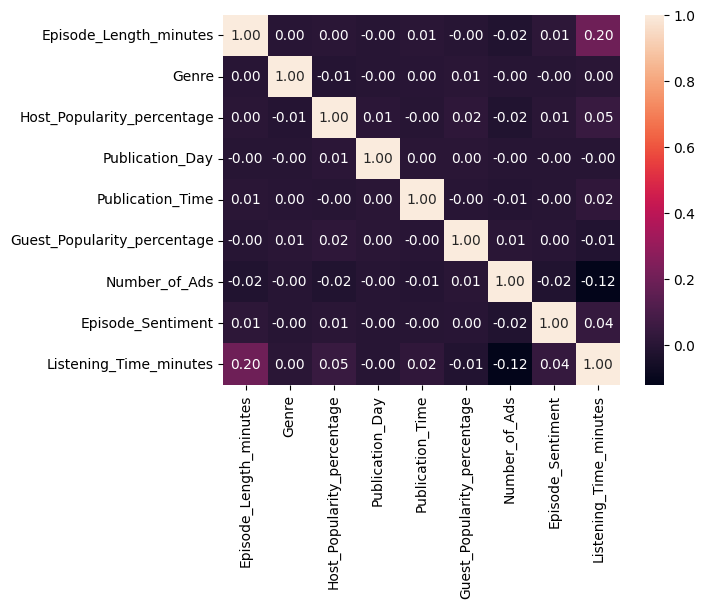

In [17]:
sns.heatmap(data.corr(),annot=True,fmt='.2f')

In [18]:
#sns.violinplot(data=data,x='Episode_Length_minutes',y='Host_Popularity_percentage')
data

,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment,Listening_Time_minutes
0,419.298741,9,74.81,5,4,52.192796,0.0,3,31.41998
1,119.800000,1,66.95,7,3,75.950000,2.0,1,88.01241
2,73.900000,2,69.97,3,2,8.970000,0.0,1,44.92531
3,67.170000,8,57.22,2,1,78.700000,2.0,3,46.27824
4,110.510000,3,80.07,2,3,58.680000,3.0,2,75.61031
...,...,...,...,...,...,...,...,...,...
749995,75.660000,2,69.36,7,1,52.192796,0.0,1,56.87058
749996,75.750000,0,35.21,7,4,52.192796,2.0,2,45.46242
749997,30.980000,4,78.58,5,1,84.890000,0.0,1,15.26000
749998,108.980000,4,45.39,5,1,93.270000,0.0,1,100.72939


<Axes: xlabel='Publication_Day', ylabel='count'>

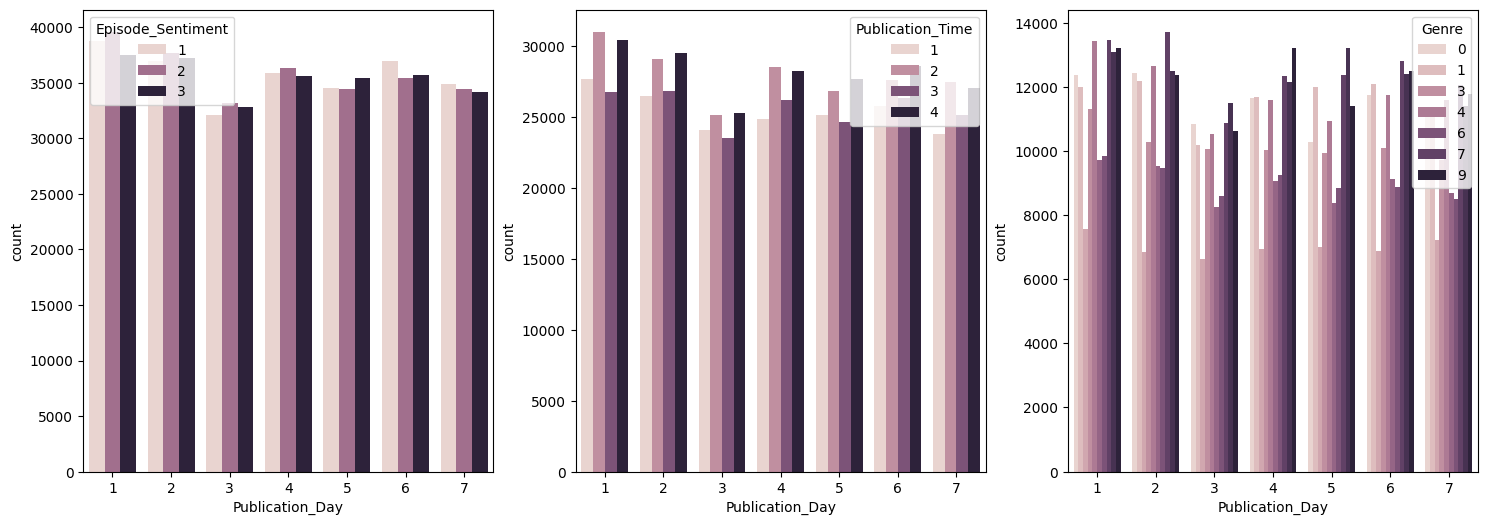

In [19]:
fig1, axes1 = plt.subplots(1, 3, figsize=(18, 6)) 
sns.countplot(data=data,x='Publication_Day',hue='Episode_Sentiment',ax=axes1[0])
sns.countplot(data=data,x='Publication_Day',hue='Publication_Time',ax=axes1[1])
sns.countplot(data=data,x='Publication_Day',hue='Genre',ax=axes1[2])

In [20]:
#sns.lineplot(data=data,x='Episode_Length_minutes',y='Listening_Time_minutes')

<Axes: ylabel='Episode_Length_minutes'>

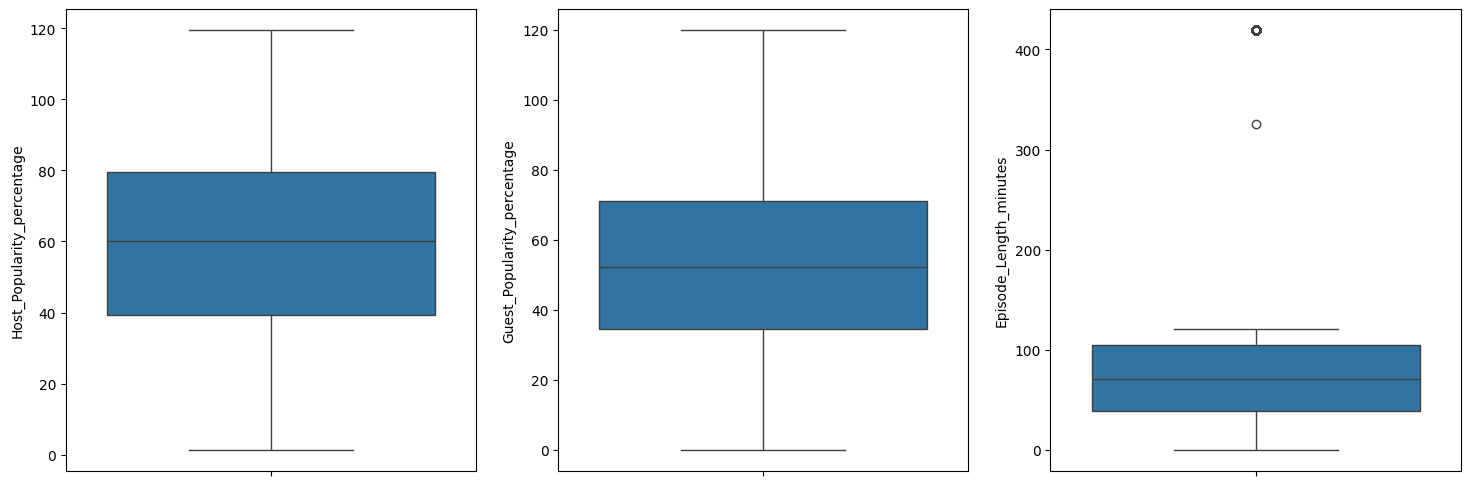

In [21]:
fig1, axes1 = plt.subplots(1, 3, figsize=(18, 6)) 
sns.boxplot(data['Host_Popularity_percentage'],ax=axes1[0])
sns.boxplot(data['Guest_Popularity_percentage'],ax=axes1[1])
sns.boxplot(data['Episode_Length_minutes'],ax=axes1[2])

In [22]:
data=data[data['Episode_Length_minutes']<300]
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 662906 entries, 1 to 749999
Data columns (total 9 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Episode_Length_minutes       662906 non-null  float64
 1   Genre                        662906 non-null  int32  
 2   Host_Popularity_percentage   662906 non-null  float64
 3   Publication_Day              662906 non-null  int64  
 4   Publication_Time             662906 non-null  int64  
 5   Guest_Popularity_percentage  662906 non-null  float64
 6   Number_of_Ads                662906 non-null  float64
 7   Episode_Sentiment            662906 non-null  int64  
 8   Listening_Time_minutes       662906 non-null  float64
dtypes: float64(5), int32(1), int64(3)
memory usage: 48.0 MB


In [23]:
from sklearn.preprocessing import MinMaxScaler 
mm_scaler=MinMaxScaler()
data['Guest_Popularity_percentage']=mm_scaler.fit_transform(data[['Guest_Popularity_percentage']])
data['Host_Popularity_percentage']=mm_scaler.fit_transform(data[['Host_Popularity_percentage']])
test['Guest_Popularity_percentage']=mm_scaler.fit_transform(test[['Guest_Popularity_percentage']])
test['Host_Popularity_percentage']=mm_scaler.fit_transform(test[['Host_Popularity_percentage']])
data


C:\Users\lapto\AppData\Local\Temp\ipykernel_32776\1828665401.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Guest_Popularity_percentage']=mm_scaler.fit_transform(data[['Guest_Popularity_percentage']])
C:\Users\lapto\AppData\Local\Temp\ipykernel_32776\1828665401.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Host_Popularity_percentage']=mm_scaler.fit_transform(data[['Host_Popularity_percentage']])


,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment,Listening_Time_minutes
1,119.80,1,0.555603,7,3,0.656893,2.0,1,88.01241
2,73.90,2,0.581161,3,2,0.077582,0.0,1,44.92531
3,67.17,8,0.473257,2,1,0.680678,2.0,3,46.27824
4,110.51,3,0.666638,2,3,0.507525,3.0,2,75.61031
5,26.54,3,0.403351,7,3,0.451417,3.0,3,22.77047
...,...,...,...,...,...,...,...,...,...
749995,75.66,2,0.575999,7,1,0.451417,0.0,1,56.87058
749996,75.75,0,0.286984,7,4,0.451417,2.0,2,45.46242
749997,30.98,4,0.654028,5,1,0.734216,0.0,1,15.26000
749998,108.98,4,0.373138,5,1,0.806694,0.0,1,100.72939


In [33]:
y=data['Listening_Time_minutes']
data.drop('Listening_Time_minutes',axis=1,inplace=True)
data
y

KeyError: 'Listening_Time_minutes'

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import root_mean_squared_error,mean_squared_error
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression , Lasso,Ridge,ElasticNet
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import BaggingRegressor
X_train,X_valid,y_train,y_valid=train_test_split(data,y,train_size=0.6,test_size=0.4,random_state=42)
#model1=RandomForestRegressor(n_estimators=500,random_state=42)
model1=XGBRegressor(random_state=42,n_estimators=500,max_depth=20)
model2=AdaBoostRegressor(n_estimators=500,random_state=42)
model3=LGBMRegressor(n_estimators=500,max_depth=20,random_state=42)


C:\Users\lapto\AppData\Roaming\Python\Python312\site-packages\dask\dataframe\__init__.py:49: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [26]:
# KF=KFold(n_splits=10,shuffle=True,random_state=42)
# accuracies1 = []
# accuracies2 = []
# accuracies3 = []
# for (train_idx, test_idx) in KF.split(data):
#     X_train, X_test = data.iloc[train_idx], data.iloc[test_idx]
#     y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

#     model3.fit(X_train, y_train)
#     model2.fit(X_train, y_train)
#     model1.fit(X_train, y_train)
#     preds1 = model1.predict(X_test)
#     preds2 = model2.predict(X_test)
#     preds3 = model3.predict(X_test)
#     acc1 = root_mean_squared_error(y_test, preds1)
#     acc2 = root_mean_squared_error(y_test, preds2)
#     acc3 = root_mean_squared_error(y_test, preds3)
#     accuracies1.append(acc1)
#     accuracies2.append(acc2)
#     accuracies3.append(acc3)
# print("Average accuracy across folds for :"+'model1 ', np.mean(acc1))
# print("Average accuracy across folds for :"+'model2 ', np.mean(acc2))
# print("Average accuracy across folds for :"+'model3 ', np.mean(acc3))

In [44]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

model = Sequential([
    Dense(128, input_shape=(X_train.shape[1],), activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(1)  
])

model.compile(optimizer='adam',
            loss='mean_squared_error',
            metrics=['mse'])

model.summary()


C:\Users\lapto\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_20 (Dense)                │ (None, 128)            │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,521 (45.00 KB)

 Trainable params: 11,521 (45.00 KB)

 Non-trainable params: 0 (0.00 B)

In [46]:
from tensorflow.keras.callbacks import EarlyStopping

#early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history =model.fit(X_train,y_train,validation_split=0.2,
    epochs=100,            
    batch_size=128,
    #callbacks=[early_stop],
    shuffle=True,
    verbose=1)

Epoch 1/100
2486/2486 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - loss: 142.1845 - mse: 142.1845 - val_loss: 131.6021 - val_mse: 131.6021
Epoch 2/100
2486/2486 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - loss: 142.6981 - mse: 142.6981 - val_loss: 137.1763 - val_mse: 137.1763
Epoch 3/100
2486/2486 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 142.7053 - mse: 142.7053 - val_loss: 132.0229 - val_mse: 132.0229
Epoch 4/100
2486/2486 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 141.5465 - mse: 141.5465 - val_loss: 139.3626 - val_mse: 139.3626
Epoch 5/100
2486/2486 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 142.3664 - mse: 142.3664 - val_loss: 128.7432 - val_mse: 128.7432
Epoch 6/100
2486/2486 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - loss: 142.0707 - mse: 142.0707 - val_loss: 136.9168 - val_mse: 136.9168
Epoch 7/100
2486/2486 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - loss: 142.1882 - mse: 142.1882 - val_loss: 133.5153 - val_mse: 133.5153
Epoch 8/100
2486/2486 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 141.9149 - mse: 141.9149 - val_los

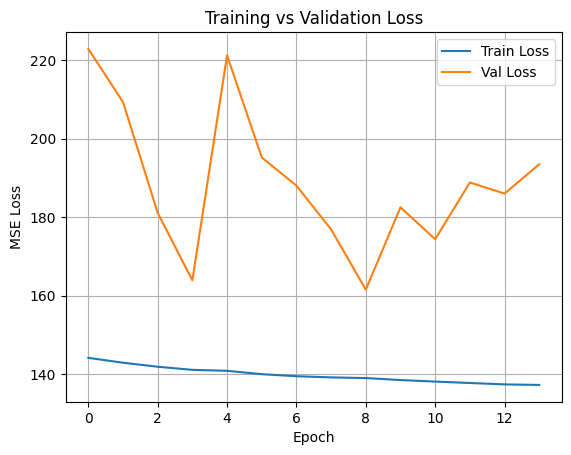

In [43]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.title('Training vs Validation Loss')
plt.legend()
plt.grid(True)
plt.show()


In [34]:
y

1          88.01241
2          44.92531
3          46.27824
4          75.61031
5          22.77047
            ...    
749995     56.87058
749996     45.46242
749997     15.26000
749998    100.72939
749999     11.94439
Name: Listening_Time_minutes, Length: 662906, dtype: float64

In [28]:
# model1.fit(data,y)
# model2.fit(data,y)
# model3.fit(data,y)

In [29]:
pred1=model1.predict(X_valid)
print(pred1)
print(root_mean_squared_error(y_valid,pred1))

NotFittedError: need to call fit or load_model beforehand

In [ ]:
pred2=model2.predict(X_valid)
print(pred2)
print(root_mean_squared_error(y_valid,pred2))

[25.16942361 84.82991649 86.75907606 ... 82.19587416 32.97620221
 20.06958217]
10.359006989752945


In [ ]:
pred3=model3.predict(X_valid)
print(pred3)
print(root_mean_squared_error(y_valid,pred3))

[25.77678356 82.64057064 90.26684815 ... 80.08687377 32.19838995
 20.16348541]
10.130090394012985


In [ ]:
test

,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment
0,78.96,2,0.309014,7,2,0.456514,1.0,2
1,27.87,5,0.596860,1,1,0.446780,0.0,2
2,69.10,1,0.567364,6,2,0.834703,0.0,3
3,115.39,1,0.181400,1,1,0.442989,2.0,3
4,72.32,4,0.482433,4,1,0.096730,2.0,2
...,...,...,...,...,...,...,...,...
249995,21.05,3,0.548972,7,2,0.825201,3.0,1
249996,85.50,1,0.338163,7,4,0.261257,2.0,1
249997,12.11,1,0.203262,5,2,0.630800,1.0,2
249998,113.46,0,0.355513,6,4,0.801147,3.0,3


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 8 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Episode_Length_minutes       250000 non-null  float64
 1   Genre                        250000 non-null  int32  
 2   Host_Popularity_percentage   250000 non-null  float64
 3   Publication_Day              250000 non-null  int64  
 4   Publication_Time             250000 non-null  int64  
 5   Guest_Popularity_percentage  250000 non-null  float64
 6   Number_of_Ads                250000 non-null  float64
 7   Episode_Sentiment            250000 non-null  int64  
dtypes: float64(4), int32(1), int64(3)
memory usage: 14.3 MB


In [ ]:
#print(model1.predict(test))
print(model2.predict(test))
print(model3.predict(test))

[55.96847068 18.12064238 50.02899832 ...  6.72484514 74.99635334
 57.18527516]
[55.55458696 18.18662963 49.93981304 ...  6.31491289 76.26869322
 58.01665019]


In [ ]:
df=pd.DataFrame({"id":id_test.values,"Listening_Time_minutes":model3.predict(test)})

In [ ]:
df.to_csv("submission.csv",index=False)